# CASA0007 Accessment 1

# Which intervention is most effective to tackle childhood obesity?

Xinyi Huang

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [15]:
#read dataset
child_obese = pd.read_csv('dataset.csv')
child_obese.info()
child_obese.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clean_air             152 non-null    float64
 1   clean_environ         152 non-null    float64
 2   health_training       152 non-null    float64
 3   school_awareness      152 non-null    float64
 4   media_awareness       152 non-null    float64
 5   sub_counselling       152 non-null    float64
 6   local_authority_type  152 non-null    object 
 7   2008_cases_total      152 non-null    int64  
 8   2018_cases_total      152 non-null    int64  
 9   2008_pop_total        152 non-null    int64  
 10  2018_pop_total        152 non-null    int64  
 11  cases_ratio_diff      152 non-null    float64
 12  cases_diff            152 non-null    float64
dtypes: float64(8), int64(4), object(1)
memory usage: 15.6+ KB


,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,local_authority_type,2008_cases_total,2018_cases_total,2008_pop_total,2018_pop_total,cases_ratio_diff,cases_diff
0,2.1000,2.2000,1.8000,4.1000,1.8000,1.9000,london_borough,593,763,172684,181779,0.0008,0.2867
1,5.0000,1.7000,2.3000,7.4000,3.0000,2.6000,london_borough,539,773,340435,355955,0.0006,0.4341
2,4.1000,4.5000,0.5000,2.6000,2.9000,1.4000,metropolitan_borough,360,527,226755,257883,0.0005,0.4639
3,3.3000,4.2000,1.9000,5.0000,1.0000,0.7000,unitary_authority,456,494,178625,189334,0.0001,0.0833
4,3.7000,5.2000,1.7000,0.8000,0.3000,1.3000,unitary_authority,311,367,158185,170463,0.0002,0.1801


In [16]:
#one-hot coding
child_obese_numeric = pd.get_dummies(child_obese)
child_obese_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   clean_air                                     152 non-null    float64
 1   clean_environ                                 152 non-null    float64
 2   health_training                               152 non-null    float64
 3   school_awareness                              152 non-null    float64
 4   media_awareness                               152 non-null    float64
 5   sub_counselling                               152 non-null    float64
 6   2008_cases_total                              152 non-null    int64  
 7   2018_cases_total                              152 non-null    int64  
 8   2008_pop_total                                152 non-null    int64  
 9   2018_pop_total                                152 non-null    int

In [17]:
child_obese_final = child_obese_numeric.drop(['local_authority_type_other_london'], axis=1)

Text(0.5, 1.0, 'Correlation Matrix')

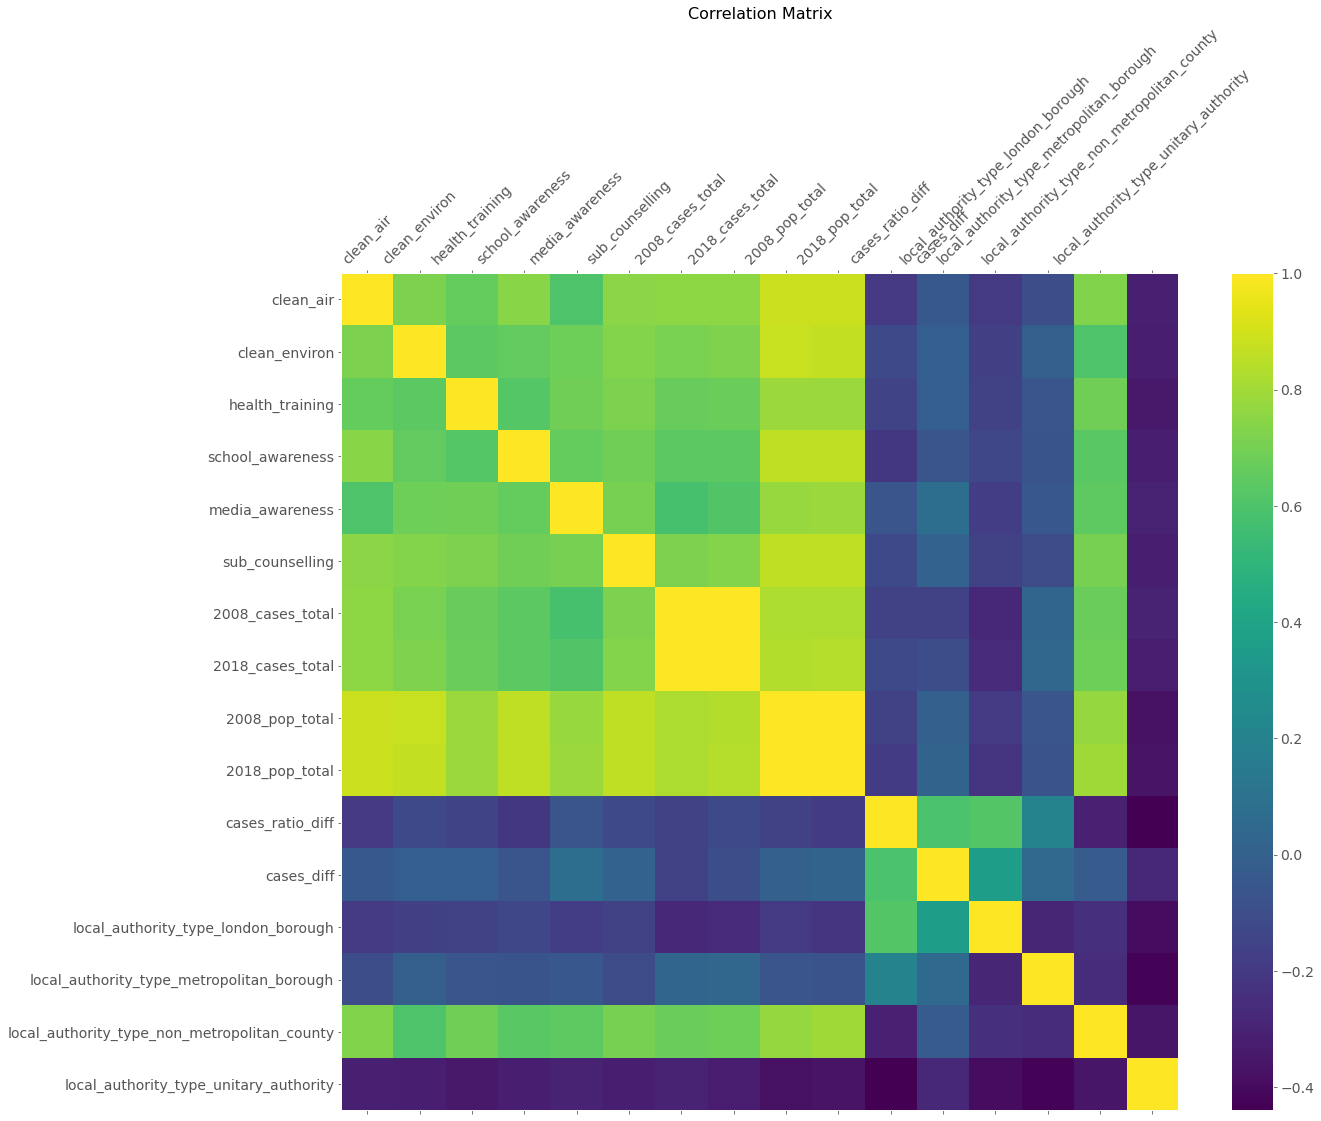

In [18]:
#Checking the correlation between variables
df = child_obese_final
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [23]:
#model 1:using budgets to predict absolute difference of the proportion of cases in the total population
cases_ratio_diff_budgets = child_obese_final.loc[:,['cases_ratio_diff','clean_air','clean_environ','health_training','school_awareness','media_awareness','sub_counselling','local_authority_type_london_borough','local_authority_type_metropolitan_borough','local_authority_type_non_metropolitan_county','local_authority_type_unitary_authority']]
model_cases_ratio_diff_budgets = sm.formula.ols('cases_ratio_diff ~ clean_air+clean_environ+health_training+school_awareness+media_awareness+sub_counselling+local_authority_type_london_borough+local_authority_type_metropolitan_borough+local_authority_type_non_metropolitan_county+local_authority_type_unitary_authority', cases_ratio_diff_budgets).fit()
model_cases_ratio_diff_budgets.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       cases_ratio_diff   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     19.57
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           3.12e-22
Time:                        01:58:36   Log-Likelihood:                 1110.5
No. Observations:                 152   AIC:                            -2199.
Df Residuals:                     141   BIC:                            -2166.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                     9.332e-05      0.000      0.552      0.582      -0.000       0.000
clean_air                                     3.059e-06   4.87e-06      0.628      0.531   -6.58e-06    1.27e-05
clean_environ                                -2.242e-06   3.73e-06     -0.602      0.548   -9.61e-06    5.13e-06
health_training                              -5.953e-06   9.87e-06     -0.603      0.547   -2.55e-05    1.36e-05
school_awareness                             -1.172e-05   4.12e-06     -2.846      0.005   -1.99e-05   -3.58e-06
media_awareness                               2.267e-05    7.6e-06      2.984      0.003    7.65e-06    3.77e-05
sub_counselling                               1.491e-05   1.31e-05      1.141      0.256   -1.09e-05    4.07e-05
local_authority_type_london_borough              0.0005      0.000      3.168      0.002       0.000       0.001
local_authority_type_metropolitan_borough        0.0003      0.000      1.920      0.057    -9.9e-06       0.001
local_authority_type_non_metropolitan_county  3.166e-05      0.000      0.173      0.863      -0.000       0.000
local_authority_type_unitary_authority        9.673e-05      0.000      0.566      0.572      -0.000       0.000
==============================================================================
Omnibus:                       30.591   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.327
Skew:                          -0.478   Prob(JB):                     1.70e-37
Kurtosis:                       8.082   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#model 2:using budgets to predict relative difference in number of cases
cases_diff_budgets = child_obese_final.loc[:,['cases_diff','clean_air','clean_environ','health_training','school_awareness','media_awareness','sub_counselling','local_authority_type_london_borough','local_authority_type_metropolitan_borough','local_authority_type_non_metropolitan_county','local_authority_type_unitary_authority']]
model_cases_diff_budgets = sm.formula.ols('cases_diff ~ clean_air+clean_environ+health_training+school_awareness+media_awareness+sub_counselling+local_authority_type_london_borough+local_authority_type_metropolitan_borough+local_authority_type_non_metropolitan_county+local_authority_type_unitary_authority', cases_diff_budgets).fit()
model_cases_diff_budgets.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             cases_diff   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     5.332
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           1.18e-06
Time:                        01:57:27   Log-Likelihood:                 120.12
No. Observations:                 152   AIC:                            -218.2
Df Residuals:                     141   BIC:                            -185.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -0.2386      0.114     -2.091      0.038      -0.464      -0.013
clean_air                                     3.501e-05      0.003      0.011      0.992      -0.006       0.007
clean_environ                                   -0.0015      0.003     -0.583      0.561      -0.006       0.004
health_training                                 -0.0056      0.007     -0.841      0.402      -0.019       0.008
school_awareness                                -0.0046      0.003     -1.665      0.098      -0.010       0.001
media_awareness                                  0.0111      0.005      2.155      0.033       0.001       0.021
sub_counselling                                  0.0034      0.009      0.387      0.699      -0.014       0.021
local_authority_type_london_borough              0.5434      0.116      4.673      0.000       0.314       0.773
local_authority_type_metropolitan_borough        0.4657      0.117      3.998      0.000       0.235       0.696
local_authority_type_non_metropolitan_county     0.4550      0.124      3.671      0.000       0.210       0.700
local_authority_type_unitary_authority           0.4022      0.115      3.484      0.001       0.174       0.630
==============================================================================
Omnibus:                        7.155   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.028   Jarque-Bera (JB):               12.331
Skew:                           0.096   Prob(JB):                      0.00210
Kurtosis:                       4.382   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

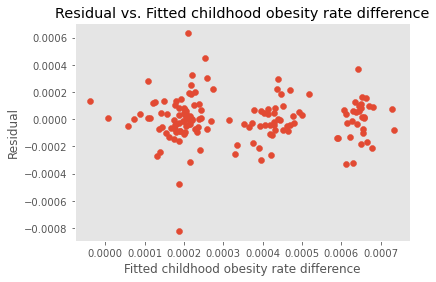

In [29]:
# Residual analysis
plt.scatter(model_cases_ratio_diff_budgets.fittedvalues, model_cases_ratio_diff_budgets.resid)
plt.xlabel('Fitted childhood obesity rate difference')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted childhood obesity rate difference')
plt.show()